# 1 Support Vector Machines

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn import svm
from utils import *

## 1.1 Example Dataset 1

In [2]:
data = loadmat('../data/ex6data1')
X = data['X']
y = np.squeeze(data['y'])

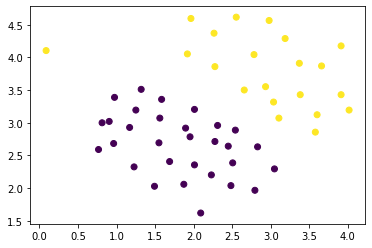

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

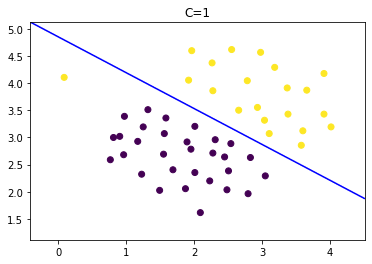

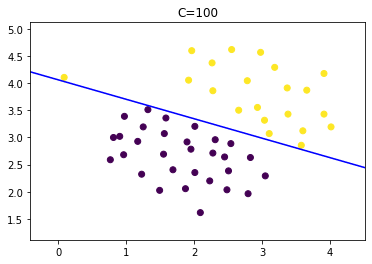

In [5]:
for C in [1, 100]:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(X, y)
    plot_decision_boundary(clf, X, y)
    plt.title('C='+str(C))
    plt.show()

## 1.2 SVM with Gaussian Kernels

### 1.2.1 Gaussian Kernel
code in utils.py

### 1.2.2 Example Dataset 2

In [7]:
data = loadmat('../data/ex6data2')
X = data['X']
y = np.squeeze(data['y'])

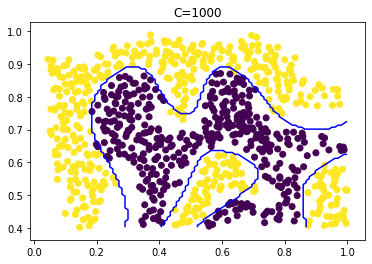

In [8]:
C = 1000
gamma = 'scale'
# clf = svm.SVC(C=C, kernel=gaussian_kernel)
clf = svm.SVC(C=C, kernel='rbf', gamma = gamma)
clf.fit(X, y)
plot_decision_boundary(clf, X, y, extra_b=0, res=100)
plt.title('C='+str(C))
plt.show()

### 1.2.3 Example Dataset 3

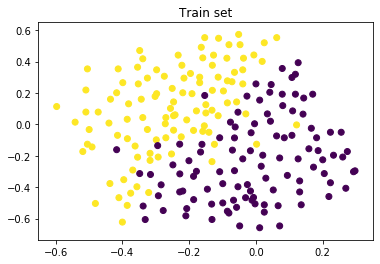

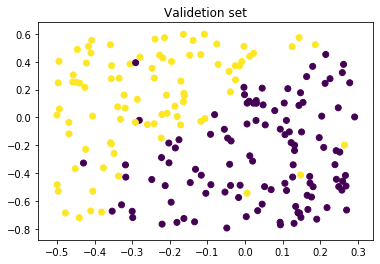

In [13]:
data = loadmat('../data/ex6data3')
X = data['X']
y = np.squeeze(data['y'])*1.0
Xval = data['Xval']
yval = np.squeeze(data['yval'])*1.0

plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Train set')
plt.show()
plt.scatter(Xval[:,0], Xval[:,1], c=yval)
plt.title('Validetion set')
plt.show()

In [10]:
C_vec = np.geomspace(0.001, 100, 50)
gamma_vec = np.geomspace(0.001, 100, 50)

accuracy = np.zeros([len(C_vec), len(gamma_vec)])
for i, C in enumerate(C_vec):
    for j, gamma in enumerate(gamma_vec):
        clf = svm.SVC(C=C, kernel='rbf', gamma = gamma)
        clf.fit(X, y)
        pred_val = clf.predict(Xval)
        accuracy[i,j] = 1 -  np.abs(pred_val-yval).sum()/len(yval)

accuracy: 0.970


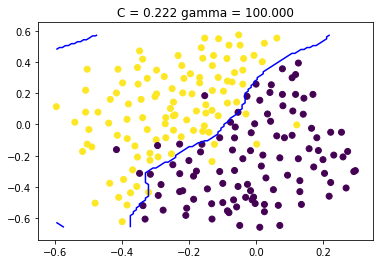

In [11]:
best_idx = accuracy.argmax()
best_C_idx, best_gamma_idx = np.unravel_index(best_idx, accuracy.shape)
best_C = C_vec[best_C_idx]
best_gamma = gamma_vec[best_gamma_idx]

print('accuracy: %.3f' % accuracy.max())
# best_clf =  svm.SVC(C=best_C, kernel='rbf', gamma = best_gamma)
best_clf =  svm.SVC(C=best_C, kernel='rbf', gamma = best_gamma)
best_clf.fit(X, y)
plot_decision_boundary(best_clf, X, y, extra_b=0, res=100)
plt.title('C = %.3f gamma = %.3f' % (best_C, best_gamma))
plt.show()